# 지하철 승/하차 분석하기 

* 공공데이터 포털에서 2016년 지하철 승/하차 데이터를 가져온다.
* https://www.data.go.kr/dataset/15003169/fileData.do

## 분석에 사용될 패키지 로딩

* 아래 Cell은 해당 패키지가 설치되어 있지 않다면, 설치하는 구문이다. 물론 설치되어 있다면 확인만 한다.

In [1]:
if(!requireNamespace("ggplot2")) install.packages('ggplot2', repos='http://cran.us.r-project.org')
if(!requireNamespace("dplyr")) install.packages('dplyr', repos='http://cran.us.r-project.org')

Loading required namespace: ggplot2
Loading required namespace: dplyr


In [2]:
library(ggplot2)
library(dplyr)

Warning message:
"package 'ggplot2' was built under R version 3.4.4"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



# 파일 디렉토리 읽어오기

* 공공데이터 포털에 저장한 파일을 이름 형태를 통일 시켜 Data폴더의 Subway에 저장
* file이라는 해당 파일이 저장된 위치를 문자열 벡터로 저장한다.

In [3]:
file <- c("./Data/Subway")

* list.files() 함수는 대상 폴더에 있는 파일 리스트를 호출하는 함수이다. 해당 폴더에 존재하는 파일의 이름을 알려준다.

In [4]:
src_file <- list.files(file)

* src_file에 어떤 파일이 저장되어 있는지 아래를 통해서 확인해보자

In [5]:
src_file

[1] "Subway_201601.csv" "Subway_201602.csv" "Subway_201603.csv"
 [4] "Subway_201604.csv" "Subway_201605.csv" "Subway_201606.csv"
 [7] "Subway_201607.csv" "Subway_201608.csv" "Subway_201609.csv"
[10] "Subway_201610.csv" "Subway_201611.csv" "Subway_201612.csv"

## 파일 읽기
* 12개의 파일을 읽어온다. 아래처럼 for문을 사용하여 파일을 읽어들인 이유는 12개의 파일에 대한 read.csv를 손으로 다 작성하기가...
* 만약에 파일의 개수가 100개 이상 된다면 그 많은 파일에 대해서 read.csv를 할 수가 없다. 물론 인내력이 있다면 가능하지만.... 
* for문을 통해서 간단한 규칙을 사용하여 모든 파일을 읽어 들인다.

In [6]:
i <- 1
for(x in src_file){
    rt <- paste(file, "/", x, sep="")
    file_name <- paste("Subway.", i, " <- read.csv(\"", rt, "\"", ", header = T)", sep="")
    print (file_name)
    eval(parse(text=file_name))
    i <- i + 1
}

[1] "Subway.1 <- read.csv(\"./Data/Subway/Subway_201601.csv\", header = T)"
[1] "Subway.2 <- read.csv(\"./Data/Subway/Subway_201602.csv\", header = T)"
[1] "Subway.3 <- read.csv(\"./Data/Subway/Subway_201603.csv\", header = T)"
[1] "Subway.4 <- read.csv(\"./Data/Subway/Subway_201604.csv\", header = T)"
[1] "Subway.5 <- read.csv(\"./Data/Subway/Subway_201605.csv\", header = T)"
[1] "Subway.6 <- read.csv(\"./Data/Subway/Subway_201606.csv\", header = T)"
[1] "Subway.7 <- read.csv(\"./Data/Subway/Subway_201607.csv\", header = T)"
[1] "Subway.8 <- read.csv(\"./Data/Subway/Subway_201608.csv\", header = T)"
[1] "Subway.9 <- read.csv(\"./Data/Subway/Subway_201609.csv\", header = T)"
[1] "Subway.10 <- read.csv(\"./Data/Subway/Subway_201610.csv\", header = T)"
[1] "Subway.11 <- read.csv(\"./Data/Subway/Subway_201611.csv\", header = T)"
[1] "Subway.12 <- read.csv(\"./Data/Subway/Subway_201612.csv\", header = T)"


# 데이터의 컬럼
* 12개의 데이터를 읽어 들였다. 이 파일의 컬럼들이 통일되어 있는지 확인한다. 만약에 컬럼이 통일되어 있지 않다면, 하나의 파일로 통합할 수 없기 때문이다. 

In [7]:
i <- 1
for(x in 1:12){
    txt <- paste("Subway.", x, sep="")
    print (txt)
    print (colnames(eval(parse(text = txt))))
    print ("=============")
}

[1] "Subway.1"
 [1] "날짜"     "호선"     "역명"     "구.분"    "할인"     "X04...05"
 [7] "X05...06" "X06...07" "X07...08" "X08...09" "X09...10" "X10...11"
[13] "X11...12" "X12...13" "X13...14" "X14...15" "X15...16" "X16...17"
[19] "X17...18" "X18...19" "X19...20" "X20...21" "X21...22" "X22...23"
[25] "X23...24" "X00...01" "X01...02" "X02...03" "X03...04"
[1] "============="
[1] "Subway.2"
 [1] "날짜"     "호선"     "역명"     "구.분"    "할인"     "X04...05"
 [7] "X05...06" "X06...07" "X07...08" "X08...09" "X09...10" "X10...11"
[13] "X11...12" "X12...13" "X13...14" "X14...15" "X15...16" "X16...17"
[19] "X17...18" "X18...19" "X19...20" "X20...21" "X21...22" "X22...23"
[25] "X23...24" "X00...01" "X01...02" "X02...03" "X03...04"
[1] "============="
[1] "Subway.3"
 [1] "날짜"     "호선"     "역명"     "구.분"    "할인"     "X04...05"
 [7] "X05...06" "X06...07" "X07...08" "X08...09" "X09...10" "X10...11"
[13] "X11...12" "X12...13" "X13...14" "X14...15" "X15...16" "X16...17"
[19] "X17...18" "X18...19" "X19...20" "X20..

* 불행하게도 파일의 컬럼이 통일되어 있지 않다. 
* head() 함수를 사용하여 데이터 형식을 확인한다.

## 데이터의 형식 통일하기

In [8]:
head(Subway.1, 2)

날짜,호선,역명,구.분,할인,X04...05,X05...06,X06...07,X07...08,X08...09,...,X18...19,X19...20,X20...21,X21...22,X22...23,X23...24,X00...01,X01...02,X02...03,X03...04
2016-01-01,1호선,서울역(150),승차,일반,44,298,243,490,909,...,2520,2129,1924,2038,1766,868,52,0,0,0
2016-01-01,1호선,서울역(150),승차,초등생,1,4,0,4,18,...,70,38,37,45,32,6,0,0,0,0


* **1월부터 5월까지 데이터에는 할인이라는 컬럼이 존재하고 그로 인해서 일반, 초등생등... 데이터가 더 들어있다.**

* colnames() 함수를 사용하여 colname를 추출해본다.

In [9]:
col <- colnames(Subway.1)

* 시간대를 확인하기 위해서 6번째부터 마지막 컬럼까지만 출력해본다.

In [10]:
col[6:length(col)]

[1] "X04...05" "X05...06" "X06...07" "X07...08" "X08...09" "X09...10"
 [7] "X10...11" "X11...12" "X12...13" "X13...14" "X14...15" "X15...16"
[13] "X16...17" "X17...18" "X18...19" "X19...20" "X20...21" "X21...22"
[19] "X22...23" "X23...24" "X00...01" "X01...02" "X02...03" "X03...04"

* 아래 for문은 group_by에 사용될 텍스트를 손으로 작성하기 귀찮아서 ? , 자동적으로 하고 싶어서 for문을 사용해서 패턴을 출력한것이다.

In [11]:
total <- ""
for (x in col[6:length(col)]){
    result <- sub("[.][.][.]", ".", x)
    result.1 <- paste(result, "=", "sum(", x, "),")
    total <- paste(total, " ", result.1)
}

In [12]:
total

[1] "   X04.05 = sum( X04...05 ),   X05.06 = sum( X05...06 ),   X06.07 = sum( X06...07 ),   X07.08 = sum( X07...08 ),   X08.09 = sum( X08...09 ),   X09.10 = sum( X09...10 ),   X10.11 = sum( X10...11 ),   X11.12 = sum( X11...12 ),   X12.13 = sum( X12...13 ),   X13.14 = sum( X13...14 ),   X14.15 = sum( X14...15 ),   X15.16 = sum( X15...16 ),   X16.17 = sum( X16...17 ),   X17.18 = sum( X17...18 ),   X18.19 = sum( X18...19 ),   X19.20 = sum( X19...20 ),   X20.21 = sum( X20...21 ),   X21.22 = sum( X21...22 ),   X22.23 = sum( X22...23 ),   X23.24 = sum( X23...24 ),   X00.01 = sum( X00...01 ),   X01.02 = sum( X01...02 ),   X02.03 = sum( X02...03 ),   X03.04 = sum( X03...04 ),"

* 위에서 나온 패턴을 사용해서 summarise() 함수안에 복사넣어서 아래와 같이 코드를 생성한다. 
* 다시 말하지만 위의 코드는 아래 코드를 손으로 타이핑하기 힘들어서 코드를 생성을 자동으로 한 것이다. 
* 밑의 코드는 물론 손으로 다 쳐도 된다.
* 아래 코드는 날짜, 호선, 역명, 구분으로 합계를 구하는 구문이다. 

In [13]:
Subway.1.trans <- Subway.1 %>% group_by(날짜, 호선, 역명, 구.분) %>% summarise( X04.05 = sum( X04...05 ),   X05.06 = sum( X05...06 ),   
                                                             X06.07 = sum( X06...07 ),   X07.08 = sum( X07...08 ),   
                                                             X08.09 = sum( X08...09 ),   X09.10 = sum( X09...10 ),   
                                                             X10.11 = sum( X10...11 ),   X11.12 = sum( X11...12 ),   
                                                             X12.13 = sum( X12...13 ),   X13.14 = sum( X13...14 ),  
                                                             X14.15 = sum( X14...15 ),   X15.16 = sum( X15...16 ),  
                                                             X16.17 = sum( X16...17 ),   X17.18 = sum( X17...18 ),  
                                                             X18.19 = sum( X18...19 ),   X19.20 = sum( X19...20 ),  
                                                             X20.21 = sum( X20...21 ),   X21.22 = sum( X21...22 ),  
                                                             X22.23 = sum( X22...23 ),   X23.24 = sum( X23...24 ),  
                                                             X00.01 = sum( X00...01 ),   X01.02 = sum( X01...02 ),  
                                                             X02.03 = sum( X02...03 ),   X03.04 = sum( X03...04 ))

Subway.2.trans <- Subway.2 %>% group_by(날짜, 호선, 역명, 구.분) %>% summarise( X04.05 = sum( X04...05 ),   X05.06 = sum( X05...06 ),   
                                                             X06.07 = sum( X06...07 ),   X07.08 = sum( X07...08 ),   
                                                             X08.09 = sum( X08...09 ),   X09.10 = sum( X09...10 ),   
                                                             X10.11 = sum( X10...11 ),   X11.12 = sum( X11...12 ),   
                                                             X12.13 = sum( X12...13 ),   X13.14 = sum( X13...14 ),  
                                                             X14.15 = sum( X14...15 ),   X15.16 = sum( X15...16 ),  
                                                             X16.17 = sum( X16...17 ),   X17.18 = sum( X17...18 ),  
                                                             X18.19 = sum( X18...19 ),   X19.20 = sum( X19...20 ),  
                                                             X20.21 = sum( X20...21 ),   X21.22 = sum( X21...22 ),  
                                                             X22.23 = sum( X22...23 ),   X23.24 = sum( X23...24 ),  
                                                             X00.01 = sum( X00...01 ),   X01.02 = sum( X01...02 ),  
                                                             X02.03 = sum( X02...03 ),   X03.04 = sum( X03...04 ))

Subway.3.trans <- Subway.3 %>% group_by(날짜, 호선, 역명, 구.분) %>% summarise( X04.05 = sum( X04...05 ),   X05.06 = sum( X05...06 ),   
                                                             X06.07 = sum( X06...07 ),   X07.08 = sum( X07...08 ),   
                                                             X08.09 = sum( X08...09 ),   X09.10 = sum( X09...10 ),   
                                                             X10.11 = sum( X10...11 ),   X11.12 = sum( X11...12 ),   
                                                             X12.13 = sum( X12...13 ),   X13.14 = sum( X13...14 ),  
                                                             X14.15 = sum( X14...15 ),   X15.16 = sum( X15...16 ),  
                                                             X16.17 = sum( X16...17 ),   X17.18 = sum( X17...18 ),  
                                                             X18.19 = sum( X18...19 ),   X19.20 = sum( X19...20 ),  
                                                             X20.21 = sum( X20...21 ),   X21.22 = sum( X21...22 ),  
                                                             X22.23 = sum( X22...23 ),   X23.24 = sum( X23...24 ),  
                                                             X00.01 = sum( X00...01 ),   X01.02 = sum( X01...02 ),  
                                                             X02.03 = sum( X02...03 ),   X03.04 = sum( X03...04 ))

Subway.4.trans <- Subway.4 %>% group_by(날짜, 호선, 역명, 구.분) %>% summarise( X04.05 = sum( X04...05 ),   X05.06 = sum( X05...06 ),   
                                                             X06.07 = sum( X06...07 ),   X07.08 = sum( X07...08 ),   
                                                             X08.09 = sum( X08...09 ),   X09.10 = sum( X09...10 ),   
                                                             X10.11 = sum( X10...11 ),   X11.12 = sum( X11...12 ),   
                                                             X12.13 = sum( X12...13 ),   X13.14 = sum( X13...14 ),  
                                                             X14.15 = sum( X14...15 ),   X15.16 = sum( X15...16 ),  
                                                             X16.17 = sum( X16...17 ),   X17.18 = sum( X17...18 ),  
                                                             X18.19 = sum( X18...19 ),   X19.20 = sum( X19...20 ),  
                                                             X20.21 = sum( X20...21 ),   X21.22 = sum( X21...22 ),  
                                                             X22.23 = sum( X22...23 ),   X23.24 = sum( X23...24 ),  
                                                             X00.01 = sum( X00...01 ),   X01.02 = sum( X01...02 ),  
                                                             X02.03 = sum( X02...03 ),   X03.04 = sum( X03...04 ))

Subway.5.trans <- Subway.5 %>% group_by(날짜, 호선, 역명, 구.분) %>% summarise( X04.05 = sum( X04...05 ),   X05.06 = sum( X05...06 ),   
                                                             X06.07 = sum( X06...07 ),   X07.08 = sum( X07...08 ),   
                                                             X08.09 = sum( X08...09 ),   X09.10 = sum( X09...10 ),   
                                                             X10.11 = sum( X10...11 ),   X11.12 = sum( X11...12 ),   
                                                             X12.13 = sum( X12...13 ),   X13.14 = sum( X13...14 ),  
                                                             X14.15 = sum( X14...15 ),   X15.16 = sum( X15...16 ),  
                                                             X16.17 = sum( X16...17 ),   X17.18 = sum( X17...18 ),  
                                                             X18.19 = sum( X18...19 ),   X19.20 = sum( X19...20 ),  
                                                             X20.21 = sum( X20...21 ),   X21.22 = sum( X21...22 ),  
                                                             X22.23 = sum( X22...23 ),   X23.24 = sum( X23...24 ),  
                                                             X00.01 = sum( X00...01 ),   X01.02 = sum( X01...02 ),  
                                                             X02.03 = sum( X02...03 ),   X03.04 = sum( X03...04 ))

In [14]:
colnames(Subway.1.trans)
colnames(Subway.2.trans)
colnames(Subway.3.trans)
colnames(Subway.4.trans)
colnames(Subway.5.trans)

[1] "날짜"   "호선"   "역명"   "구.분"  "X04.05" "X05.06" "X06.07" "X07.08"
 [9] "X08.09" "X09.10" "X10.11" "X11.12" "X12.13" "X13.14" "X14.15" "X15.16"
[17] "X16.17" "X17.18" "X18.19" "X19.20" "X20.21" "X21.22" "X22.23" "X23.24"
[25] "X00.01" "X01.02" "X02.03" "X03.04"

[1] "날짜"   "호선"   "역명"   "구.분"  "X04.05" "X05.06" "X06.07" "X07.08"
 [9] "X08.09" "X09.10" "X10.11" "X11.12" "X12.13" "X13.14" "X14.15" "X15.16"
[17] "X16.17" "X17.18" "X18.19" "X19.20" "X20.21" "X21.22" "X22.23" "X23.24"
[25] "X00.01" "X01.02" "X02.03" "X03.04"

[1] "날짜"   "호선"   "역명"   "구.분"  "X04.05" "X05.06" "X06.07" "X07.08"
 [9] "X08.09" "X09.10" "X10.11" "X11.12" "X12.13" "X13.14" "X14.15" "X15.16"
[17] "X16.17" "X17.18" "X18.19" "X19.20" "X20.21" "X21.22" "X22.23" "X23.24"
[25] "X00.01" "X01.02" "X02.03" "X03.04"

[1] "날짜"   "호선"   "역명"   "구.분"  "X04.05" "X05.06" "X06.07" "X07.08"
 [9] "X08.09" "X09.10" "X10.11" "X11.12" "X12.13" "X13.14" "X14.15" "X15.16"
[17] "X16.17" "X17.18" "X18.19" "X19.20" "X20.21" "X21.22" "X22.23" "X23.24"
[25] "X00.01" "X01.02" "X02.03" "X03.04"

[1] "날짜"   "호선"   "역명"   "구.분"  "X04.05" "X05.06" "X06.07" "X07.08"
 [9] "X08.09" "X09.10" "X10.11" "X11.12" "X12.13" "X13.14" "X14.15" "X15.16"
[17] "X16.17" "X17.18" "X18.19" "X19.20" "X20.21" "X21.22" "X22.23" "X23.24"
[25] "X00.01" "X01.02" "X02.03" "X03.04"

* 이제 subset() 함수와 index 방식을 사용하여 불필요 없는 컬럼 삭제 및 순서를 변경해보자

In [15]:
#subway.01.trans[-c(2)]
Subway.1.trans <-subset(Subway.1.trans, select = -호선)[, c(2,1,3, 5:(length(Subway.1.trans)-3))]
Subway.2.trans <-subset(Subway.2.trans, select = -호선)[, c(2,1,3, 5:(length(Subway.2.trans)-3))]
Subway.3.trans <-subset(Subway.3.trans, select = -호선)[, c(2,1,3, 5:(length(Subway.3.trans)-3))]
Subway.4.trans <-subset(Subway.4.trans, select = -호선)[, c(2,1,3, 5:(length(Subway.4.trans)-3))]
Subway.5.trans <-subset(Subway.5.trans, select = -호선)[, c(2,1,3, 5:(length(Subway.5.trans)-3))]

In [16]:
colnames(Subway.1.trans)
colnames(Subway.2.trans)
colnames(Subway.3.trans)
colnames(Subway.4.trans)
colnames(Subway.5.trans)

[1] "역명"   "날짜"   "구.분"  "X05.06" "X06.07" "X07.08" "X08.09" "X09.10"
 [9] "X10.11" "X11.12" "X12.13" "X13.14" "X14.15" "X15.16" "X16.17" "X17.18"
[17] "X18.19" "X19.20" "X20.21" "X21.22" "X22.23" "X23.24" "X00.01" "X01.02"

[1] "역명"   "날짜"   "구.분"  "X05.06" "X06.07" "X07.08" "X08.09" "X09.10"
 [9] "X10.11" "X11.12" "X12.13" "X13.14" "X14.15" "X15.16" "X16.17" "X17.18"
[17] "X18.19" "X19.20" "X20.21" "X21.22" "X22.23" "X23.24" "X00.01" "X01.02"

[1] "역명"   "날짜"   "구.분"  "X05.06" "X06.07" "X07.08" "X08.09" "X09.10"
 [9] "X10.11" "X11.12" "X12.13" "X13.14" "X14.15" "X15.16" "X16.17" "X17.18"
[17] "X18.19" "X19.20" "X20.21" "X21.22" "X22.23" "X23.24" "X00.01" "X01.02"

[1] "역명"   "날짜"   "구.분"  "X05.06" "X06.07" "X07.08" "X08.09" "X09.10"
 [9] "X10.11" "X11.12" "X12.13" "X13.14" "X14.15" "X15.16" "X16.17" "X17.18"
[17] "X18.19" "X19.20" "X20.21" "X21.22" "X22.23" "X23.24" "X00.01" "X01.02"

[1] "역명"   "날짜"   "구.분"  "X05.06" "X06.07" "X07.08" "X08.09" "X09.10"
 [9] "X10.11" "X11.12" "X12.13" "X13.14" "X14.15" "X15.16" "X16.17" "X17.18"
[17] "X18.19" "X19.20" "X20.21" "X21.22" "X22.23" "X23.24" "X00.01" "X01.02"

# 구.분 이라는 문구를 구분으로 바꾸기
* gsub() 함수를 사용하여 문자열을 변경한다. 구.분을 구분으로 변경한다.

In [17]:
names(Subway.1.trans) <- gsub(x = names(Subway.1.trans), pattern = "구.분", replacement = "구분")  
names(Subway.2.trans) <- gsub(x = names(Subway.2.trans), pattern = "구.분", replacement = "구분")  
names(Subway.3.trans) <- gsub(x = names(Subway.3.trans), pattern = "구.분", replacement = "구분")  
names(Subway.4.trans) <- gsub(x = names(Subway.4.trans), pattern = "구.분", replacement = "구분")  
names(Subway.5.trans) <- gsub(x = names(Subway.5.trans), pattern = "구.분", replacement = "구분")  

In [18]:
colnames(Subway.1.trans)
colnames(Subway.2.trans)
colnames(Subway.3.trans)
colnames(Subway.4.trans)
colnames(Subway.5.trans)

[1] "역명"   "날짜"   "구분"   "X05.06" "X06.07" "X07.08" "X08.09" "X09.10"
 [9] "X10.11" "X11.12" "X12.13" "X13.14" "X14.15" "X15.16" "X16.17" "X17.18"
[17] "X18.19" "X19.20" "X20.21" "X21.22" "X22.23" "X23.24" "X00.01" "X01.02"

[1] "역명"   "날짜"   "구분"   "X05.06" "X06.07" "X07.08" "X08.09" "X09.10"
 [9] "X10.11" "X11.12" "X12.13" "X13.14" "X14.15" "X15.16" "X16.17" "X17.18"
[17] "X18.19" "X19.20" "X20.21" "X21.22" "X22.23" "X23.24" "X00.01" "X01.02"

[1] "역명"   "날짜"   "구분"   "X05.06" "X06.07" "X07.08" "X08.09" "X09.10"
 [9] "X10.11" "X11.12" "X12.13" "X13.14" "X14.15" "X15.16" "X16.17" "X17.18"
[17] "X18.19" "X19.20" "X20.21" "X21.22" "X22.23" "X23.24" "X00.01" "X01.02"

[1] "역명"   "날짜"   "구분"   "X05.06" "X06.07" "X07.08" "X08.09" "X09.10"
 [9] "X10.11" "X11.12" "X12.13" "X13.14" "X14.15" "X15.16" "X16.17" "X17.18"
[17] "X18.19" "X19.20" "X20.21" "X21.22" "X22.23" "X23.24" "X00.01" "X01.02"

[1] "역명"   "날짜"   "구분"   "X05.06" "X06.07" "X07.08" "X08.09" "X09.10"
 [9] "X10.11" "X11.12" "X12.13" "X13.14" "X14.15" "X15.16" "X16.17" "X17.18"
[17] "X18.19" "X19.20" "X20.21" "X21.22" "X22.23" "X23.24" "X00.01" "X01.02"

* 지금까지 만든 데이터를 하나의 파일로 합친다.

In [19]:
total.df <- rbind(Subway.1.trans, Subway.2.trans, Subway.3.trans, Subway.4.trans, Subway.5.trans)

In [20]:
head(total.df,5)
tail(total.df,5)

역명,날짜,구분,X05.06,X06.07,X07.08,X08.09,X09.10,X10.11,X11.12,...,X16.17,X17.18,X18.19,X19.20,X20.21,X21.22,X22.23,X23.24,X00.01,X01.02
동대문(155),2016-01-01,승차,147,168,170,293,479,543,625,...,1034,1065,625,614,475,414,291,138,6,0
동대문(155),2016-01-01,하차,31,164,146,164,354,487,901,...,1167,1158,869,827,660,614,471,348,122,0
동묘앞(159),2016-01-01,승차,37,65,66,110,161,245,344,...,1129,975,404,198,139,136,81,52,2,0
동묘앞(159),2016-01-01,하차,19,75,88,147,199,359,661,...,587,353,231,165,149,146,176,144,106,0
서울역(150),2016-01-01,승차,405,339,584,1144,1723,2087,2983,...,3554,3200,3076,2519,2281,2398,2056,996,58,0


역명,날짜,구분,X05.06,X06.07,X07.08,X08.09,X09.10,X10.11,X11.12,...,X16.17,X17.18,X18.19,X19.20,X20.21,X21.22,X22.23,X23.24,X00.01,X01.02
한성대입구(419),2016-05-31,하차,61,459,974,2123,1631,907,812,...,954,1425,1622,1563,1086,936,927,601,345,1
혜화(420),2016-05-31,승차,154,391,889,1155,1051,1389,1507,...,3122,3802,4995,2942,2887,4534,4239,1936,320,0
혜화(420),2016-05-31,하차,103,879,2827,6303,4144,3065,2552,...,2176,2469,4047,3419,1185,954,854,529,268,0
회현(425),2016-05-31,승차,112,150,280,453,526,830,1408,...,3291,4416,5286,3283,2492,1650,983,596,72,0
회현(425),2016-05-31,하차,45,1348,3217,7461,4707,3765,4124,...,1520,1079,924,559,346,354,335,221,59,8


# 6~11월 데이터 전처리
* 1월부터 5월까지 데이터를 6월~11월 기준으로 컬럼을 변경했기 때문에 6~11월까지는 통합만 한다.

In [21]:
total.df.2 <- rbind(total.df, Subway.6, Subway.7, Subway.8, Subway.9, Subway.10, Subway.11)

In [22]:
dim(total.df)
dim(total.df.2)

[1] 36176    24

[1] 79730    24

In [23]:
tail(total.df.2)

역명,날짜,구분,X05.06,X06.07,X07.08,X08.09,X09.10,X10.11,X11.12,...,X16.17,X17.18,X18.19,X19.20,X20.21,X21.22,X22.23,X23.24,X00.01,X01.02
남태령(434),2016-11-28,승차,21,38,184,232,130,69,53,...,87,171,270,79,43,17,12,1,1,0
남태령(434),2016-11-28,하차,0,54,202,240,55,42,37,...,46,56,78,62,43,31,47,19,9,0
남태령(434),2016-11-29,승차,20,32,173,204,141,76,67,...,150,231,365,106,39,38,8,4,1,0
남태령(434),2016-11-29,하차,2,47,202,235,81,59,43,...,46,57,73,73,44,47,28,8,12,1
남태령(434),2016-11-30,승차,24,31,178,212,129,70,59,...,69,157,347,74,36,65,12,6,1,0
남태령(434),2016-11-30,하차,1,56,179,255,61,56,37,...,45,69,103,78,38,55,40,21,8,0


# 12월 데이터 처리 

In [24]:
head(Subway.12)

역명,날짜,구분,X05.06시,X06.07시,X07.08시,X08.09시,X09.10시,X10.11시,X11.12시,...,X16.17시,X17.18시,X18.19시,X19.20시,X20.21시,X21.22시,X22.23시,X23.24시,X00.01시,X01.02시
서울역(150),2016-12-01,승차,411,552,1792,3429,2737,2430,3161,...,4145,4984,9595,5217,3492,3978,2742,1380,198,0
서울역(150),2016-12-01,하차,280,1680,4629,10313,5586,2920,2673,...,2905,3084,3715,2723,1794,1657,1533,761,373,32
서울역(150),2016-12-02,승차,434,520,1695,3456,2848,2568,3398,...,5180,6141,10682,6169,4169,4479,4554,1794,443,0
서울역(150),2016-12-02,하차,255,1609,4504,10225,5322,3050,2435,...,3692,3545,5575,3389,2141,2076,1928,1074,547,64
서울역(150),2016-12-03,승차,543,467,982,2080,3000,3077,4340,...,8023,6418,6575,4904,4742,4683,4654,1697,228,0
서울역(150),2016-12-03,하차,260,1355,1853,2337,3223,3218,3230,...,5384,6014,5494,3803,3440,3771,3317,1642,837,131


* 왜 12월 데이터만 시간 뒤에 시가 존재하는지 모르겠지만 이로 인해서 컬럼들이 통일되지 않기 때문에 제거해 준다.

In [25]:
names(Subway.12) <- gsub(x = names(Subway.12), pattern = "시", replacement = "")  

In [26]:
colnames(Subway.11)
colnames(Subway.12)

[1] "역명"   "날짜"   "구분"   "X05.06" "X06.07" "X07.08" "X08.09" "X09.10"
 [9] "X10.11" "X11.12" "X12.13" "X13.14" "X14.15" "X15.16" "X16.17" "X17.18"
[17] "X18.19" "X19.20" "X20.21" "X21.22" "X22.23" "X23.24" "X00.01" "X01.02"

[1] "역명"   "날짜"   "구분"   "X05.06" "X06.07" "X07.08" "X08.09" "X09.10"
 [9] "X10.11" "X11.12" "X12.13" "X13.14" "X14.15" "X15.16" "X16.17" "X17.18"
[17] "X18.19" "X19.20" "X20.21" "X21.22" "X22.23" "X23.24" "X00.01" "X01.02"

# 최종 데이터 통합
* 지금까지 만든 데이터 통합한다.

In [27]:
subway <- rbind(total.df.2, Subway.12)

In [28]:
head(subway, 3)
tail(subway,3)
dim(subway)

역명,날짜,구분,X05.06,X06.07,X07.08,X08.09,X09.10,X10.11,X11.12,...,X16.17,X17.18,X18.19,X19.20,X20.21,X21.22,X22.23,X23.24,X00.01,X01.02
동대문(155),2016-01-01,승차,147,168,170,293,479,543,625,...,1034,1065,625,614,475,414,291,138,6,0
동대문(155),2016-01-01,하차,31,164,146,164,354,487,901,...,1167,1158,869,827,660,614,471,348,122,0
동묘앞(159),2016-01-01,승차,37,65,66,110,161,245,344,...,1129,975,404,198,139,136,81,52,2,0


역명,날짜,구분,X05.06,X06.07,X07.08,X08.09,X09.10,X10.11,X11.12,...,X16.17,X17.18,X18.19,X19.20,X20.21,X21.22,X22.23,X23.24,X00.01,X01.02
남태령(434),2016-12-30,하차,4,39,75,154,61,30,20,...,47,66,81,59,47,30,34,25,14,0
남태령(434),2016-12-31,승차,16,22,19,93,81,71,60,...,142,246,307,36,15,24,10,9,0,0
남태령(434),2016-12-31,하차,0,17,23,40,26,55,57,...,35,50,71,60,27,27,31,15,5,0


[1] 87108    24

### write.csv() 함수를 사용해서 하나의 data.frame으로 통합된 객체를 저장한다.

In [431]:
write.csv(subway, "./Data/all_subway.csv")

### substr() 함수는 아래 간단한 예제처럼... 대상 텍스트에서 구간을추출하는 것이다.
* 아래에서 사용할 테니 기억을..

In [32]:
a <- '2016-01-01'

In [33]:
a

[1] "2016-01-01"

In [34]:
substr(a,1,7)

[1] "2016-01"

# 여기부터는 데이터 시각화

In [1]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.4.3"

### 중간에 다시 시작했다면 최종데이터를 다시 읽자
* read.csv에서 check.names은 파일에 있는 그대로 읽겠다는 의미이다. 
* R에서 파일 읽는 부분은 따로 정리해서 배포할 예정

In [12]:
subway <- read.csv("./Data/all_subway.csv", header = T, check.names=F)

In [13]:
str(subway)

'data.frame':	87108 obs. of  25 variables:
 $       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ 역명  : Factor w/ 119 levels "가락시장(340)",..: 28 28 33 33 52 52 61 61 69 69 ...
 $ 날짜  : Factor w/ 366 levels "2016-01-01","2016-01-02",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ 구분  : Factor w/ 2 levels "승차","하차": 1 2 1 2 1 2 1 2 1 2 ...
 $ X05.06: int  147 31 37 19 405 341 98 68 113 52 ...
 $ X06.07: int  168 164 65 75 339 1637 127 306 176 126 ...
 $ X07.08: int  170 146 66 88 584 1753 110 554 172 111 ...
 $ X08.09: int  293 164 110 147 1144 1856 191 939 301 188 ...
 $ X09.10: int  479 354 161 199 1723 2438 298 689 354 245 ...
 $ X10.11: int  543 487 245 359 2087 2425 582 665 471 282 ...
 $ X11.12: int  625 901 344 661 2983 2548 700 884 593 371 ...
 $ X12.13: int  671 1078 543 907 3527 2718 604 956 555 417 ...
 $ X13.14: int  797 1323 652 1014 3386 2973 731 1084 595 423 ...
 $ X14.15: int  962 1332 835 1148 2613 2921 900 1216 551 427 ...
 $ X15.16: int  1006 1297 1035 908 3639 3341 1069 1033 528 508 ...
 $ X16.17

* 위의 첫 컬럼이 공백이 있는데 이것을 삭제하자

In [36]:
subway <- subway[, -c(1)]

In [37]:
str(subway)

'data.frame':	87108 obs. of  24 variables:
 $ 역명  : Factor w/ 119 levels "가락시장(340)",..: 28 28 33 33 52 52 61 61 69 69 ...
 $ 날짜  : Factor w/ 366 levels "2016-01-01","2016-01-02",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ 구분  : Factor w/ 2 levels "승차","하차": 1 2 1 2 1 2 1 2 1 2 ...
 $ X05.06: int  147 31 37 19 405 341 98 68 113 52 ...
 $ X06.07: int  168 164 65 75 339 1637 127 306 176 126 ...
 $ X07.08: int  170 146 66 88 584 1753 110 554 172 111 ...
 $ X08.09: int  293 164 110 147 1144 1856 191 939 301 188 ...
 $ X09.10: int  479 354 161 199 1723 2438 298 689 354 245 ...
 $ X10.11: int  543 487 245 359 2087 2425 582 665 471 282 ...
 $ X11.12: int  625 901 344 661 2983 2548 700 884 593 371 ...
 $ X12.13: int  671 1078 543 907 3527 2718 604 956 555 417 ...
 $ X13.14: int  797 1323 652 1014 3386 2973 731 1084 595 423 ...
 $ X14.15: int  962 1332 835 1148 2613 2921 900 1216 551 427 ...
 $ X15.16: int  1006 1297 1035 908 3639 3341 1069 1033 528 508 ...
 $ X16.17: int  1034 1167 1129 587 3554 3108 1339 

In [38]:
head(subway)
tail(subway)
colnames(subway)

역명,날짜,구분,X05.06,X06.07,X07.08,X08.09,X09.10,X10.11,X11.12,...,X16.17,X17.18,X18.19,X19.20,X20.21,X21.22,X22.23,X23.24,X00.01,X01.02
동대문(155),2016-01-01,승차,147,168,170,293,479,543,625,...,1034,1065,625,614,475,414,291,138,6,0
동대문(155),2016-01-01,하차,31,164,146,164,354,487,901,...,1167,1158,869,827,660,614,471,348,122,0
동묘앞(159),2016-01-01,승차,37,65,66,110,161,245,344,...,1129,975,404,198,139,136,81,52,2,0
동묘앞(159),2016-01-01,하차,19,75,88,147,199,359,661,...,587,353,231,165,149,146,176,144,106,0
서울역(150),2016-01-01,승차,405,339,584,1144,1723,2087,2983,...,3554,3200,3076,2519,2281,2398,2056,996,58,0
서울역(150),2016-01-01,하차,341,1637,1753,1856,2438,2425,2548,...,3108,2656,2134,1859,1394,1344,1056,612,222,0


,역명,날짜,구분,X05.06,X06.07,X07.08,X08.09,X09.10,X10.11,X11.12,...,X16.17,X17.18,X18.19,X19.20,X20.21,X21.22,X22.23,X23.24,X00.01,X01.02
87103,남태령(434),2016-12-29,승차,19,31,122,167,172,86,73,...,73,158,282,106,33,19,17,10,1,0
87104,남태령(434),2016-12-29,하차,2,26,189,238,68,64,30,...,46,57,67,78,36,50,39,24,17,0
87105,남태령(434),2016-12-30,승차,18,23,125,165,111,80,61,...,93,162,275,164,41,29,22,10,1,0
87106,남태령(434),2016-12-30,하차,4,39,75,154,61,30,20,...,47,66,81,59,47,30,34,25,14,0
87107,남태령(434),2016-12-31,승차,16,22,19,93,81,71,60,...,142,246,307,36,15,24,10,9,0,0
87108,남태령(434),2016-12-31,하차,0,17,23,40,26,55,57,...,35,50,71,60,27,27,31,15,5,0


[1] "역명"   "날짜"   "구분"   "X05.06" "X06.07" "X07.08" "X08.09" "X09.10"
 [9] "X10.11" "X11.12" "X12.13" "X13.14" "X14.15" "X15.16" "X16.17" "X17.18"
[17] "X18.19" "X19.20" "X20.21" "X21.22" "X22.23" "X23.24" "X00.01" "X01.02"

* unique함수는 벡터에서 유일한 값만 전달해주는 함수 
* grep함수는 벡터에서 내가 찾는 문자가 몇 번에 존재하는지 알려준다.

In [39]:
unique(subway$역명)
grep( "강남", unique(subway$역명))

[1] 동대문(155)             동묘앞(159)             서울역(150)            
  [4] 시청(151)               신설동(156)             제기동(157)            
  [7] 종각(152)               종로3가(153)            종로5가(154)           
 [10] 청량리(지하)(158)       강남(222)               강변(214)              
 [13] 건대입구(212)           교대(223)               구로디지털단지(232)    
 [16] 구의(213)               낙성대(227)             당산(237)              
 [19] 대림(233)               도림천(247)             동대문역사문화공원(205)
 [22] 뚝섬(210)               문래(235)               방배(225)              
 [25] 봉천(229)               사당(226)               삼성(219)              
 [28] 상왕십리(207)           서울대입구(228)         서초(224)              
 [31] 선릉(220)               성수(211)               시청(201)              
 [34] 신답(245)               신당(206)               신대방(231)            
 [37] 신도림(234)             신림(230)               신설동(246)            
 [40] 신정네거리(249)         신천(217)               신촌(240)              
 [43] 아현(242)               양천구청(248)           역삼(221)              
 [46] 영등포구청(236)         왕십리(성동구청)(208)   용답(244)              
 [49] 용두(250)               을지로3가(203)          을지로4가(204)         
 [52] 을지로입구(202)         이대(241)               잠실(216)              
 [55] 잠실나루(215)           종합운동장(218)         충정로(243)            
 [58] 한양대(209)             합정(238)               홍대입구(239)          
 [61] 가락시장(340)           경복궁(317)             경찰병원(341)          
 [64] 고속터미널(329)         교대(330)               구파발(310)            
 [67] 금호(324)               남부터미널(331)         녹번(313)              
 [70] 대청(337)               대치(335)               도곡(334)              
 [73] 독립문(316)             동대입구(322)           매봉(333)              
 [76] 무악재(315)             불광(312)               수서(339)              
 [79] 신사(327)               안국(318)               압구정(326)            
 [82] 약수(323)               양재(332)               연신내(311)            
 [85] 오금(342)               옥수(325)               을지로3가(320)         
 [88] 일원(338)               잠원(328)               종로3가(319)           
 [91] 지축(309)               학여울(336)             홍제(314)              
 [94] 길음(417)               남태령(434)             노원(411)              
 [97] 당고개(409)             동대문(421)             동대문역사문화공원(422)
[100] 동작(431)               명동(424)               미아(415)              
[103] 미아사거리(416)         사당(433)               삼각지(428)            
[106] 상계(410)               서울역(426)             성신여대입구(418)      
[109] 수유(강북구청)(414)     숙대입구(427)           신용산(429)            
[112] 쌍문(413)               이촌(430)               창동(412)              
[115] 총신대입구(432)         충무로(423)             한성대입구(419)        
[118] 혜화(420)               회현(425)              
119 Levels: 가락시장(340) 강남(222) 강변(214) 건대입구(212) ... 회현(425)

[1] 11

### 역명 뒤에 붙은 숫자때문에 위치를 찾는 것임
* 강남이라고 적혀 있으면 좋은데 강남(222) 이렇게 적혀 있자나 그래서 정확히 알수 없으니까 grep으로 위치를파악해서 
* 해당 위치에 해당되는 역명 출력할려고..

# 강남

In [40]:
unique(subway$역명)[11]

[1] 강남(222)
119 Levels: 가락시장(340) 강남(222) 강변(214) 건대입구(212) ... 회현(425)

* 강남이 32번째 존재한다고 위에서 알려줬기 때문에 32번째 위치의 값을 출력해보니 강남(222)가 출력되었다. 
* 여기서 우리는 강남역이 강남(222)라는 것을 알게되었다. 이제부터 이 역명을 사용할 것이다

In [41]:
head(subway,3)

역명,날짜,구분,X05.06,X06.07,X07.08,X08.09,X09.10,X10.11,X11.12,...,X16.17,X17.18,X18.19,X19.20,X20.21,X21.22,X22.23,X23.24,X00.01,X01.02
동대문(155),2016-01-01,승차,147,168,170,293,479,543,625,...,1034,1065,625,614,475,414,291,138,6,0
동대문(155),2016-01-01,하차,31,164,146,164,354,487,901,...,1167,1158,869,827,660,614,471,348,122,0
동묘앞(159),2016-01-01,승차,37,65,66,110,161,245,344,...,1129,975,404,198,139,136,81,52,2,0


* 강남만 따로 추출해보자

In [42]:
kangnam <- subway[ subway$역명 == "강남(222)", ]

In [43]:
dim(kangnam)

[1] 732  24

In [44]:
head(kangnam)


,역명,날짜,구분,X05.06,X06.07,X07.08,X08.09,X09.10,X10.11,X11.12,...,X16.17,X17.18,X18.19,X19.20,X20.21,X21.22,X22.23,X23.24,X00.01,X01.02
21,강남(222),2016-01-01,승차,1381,1133,671,677,699,932,1048,...,2716,2951,2902,2694,2863,3734,3919,2273,0,0
22,강남(222),2016-01-01,하차,174,757,765,1201,1984,1741,1836,...,3376,3683,3616,2853,2164,1820,1526,1036,2,0
259,강남(222),2016-01-02,승차,516,698,646,903,1341,1732,2269,...,5739,6334,5294,4046,4306,5471,6194,3658,0,0
260,강남(222),2016-01-02,하차,250,829,1137,2684,4896,4152,3920,...,5195,6129,6279,4093,2939,2623,1966,1687,5,0
497,강남(222),2016-01-03,승차,734,711,590,703,1076,1092,1503,...,3972,4210,4039,3495,3855,4725,4295,2013,0,0
498,강남(222),2016-01-03,하차,122,601,740,1412,2723,2424,2845,...,4092,4389,3970,2834,2076,1700,1223,787,0,0


* apply함수는 첫번째 인수는 대상들 두번째 인수는 1을 행, 2는 열로, 세번째는 어떤 함수를 적용할 것인지 설정한다.
* 아래는 4번째 x05.06~ 마지막 x01.02까지 모든 행의 값을 더해서 sum이라는 컬럼을 생성하고 합계를 입력

In [45]:
kangnam$sum <- apply(kangnam[ , c(4:length(kangnam))], 1, sum)

In [46]:
head(kangnam)

,역명,날짜,구분,X05.06,X06.07,X07.08,X08.09,X09.10,X10.11,X11.12,...,X17.18,X18.19,X19.20,X20.21,X21.22,X22.23,X23.24,X00.01,X01.02,sum
21,강남(222),2016-01-01,승차,1381,1133,671,677,699,932,1048,...,2951,2902,2694,2863,3734,3919,2273,0,0,37829
22,강남(222),2016-01-01,하차,174,757,765,1201,1984,1741,1836,...,3683,3616,2853,2164,1820,1526,1036,2,0,39281
259,강남(222),2016-01-02,승차,516,698,646,903,1341,1732,2269,...,6334,5294,4046,4306,5471,6194,3658,0,0,64926
260,강남(222),2016-01-02,하차,250,829,1137,2684,4896,4152,3920,...,6129,6279,4093,2939,2623,1966,1687,5,0,70961
497,강남(222),2016-01-03,승차,734,711,590,703,1076,1092,1503,...,4210,4039,3495,3855,4725,4295,2013,0,0,47465
498,강남(222),2016-01-03,하차,122,601,740,1412,2723,2424,2845,...,4389,3970,2834,2076,1700,1223,787,0,0,48185


* 위의 데이터 프레임을 보니 첫 컬럼이 이상하다.
* colnames() 함수를 통해서 확인

### 강남 테스트위해서
* substr()를 사용하여 월 컬럼을 생성한다.

In [51]:
kangnam <- kangnam %>% 
mutate( 월 = substr(kangnam$날짜, 1, 7))

* 월별 합계를 계산한다.

In [52]:
kangnam.graph <- kangnam %>% group_by(월) %>% summarise( Month.Total = sum(sum))

In [53]:
kangnam.graph

월,Month.Total
2016-01,6565737
2016-02,5755230
2016-03,6308157
2016-04,5856535
2016-05,5919827
2016-06,5826363
2016-07,6788786
2016-08,6355968
2016-09,5460894
2016-10,5851270


* 기본 그래프로도 그려보자

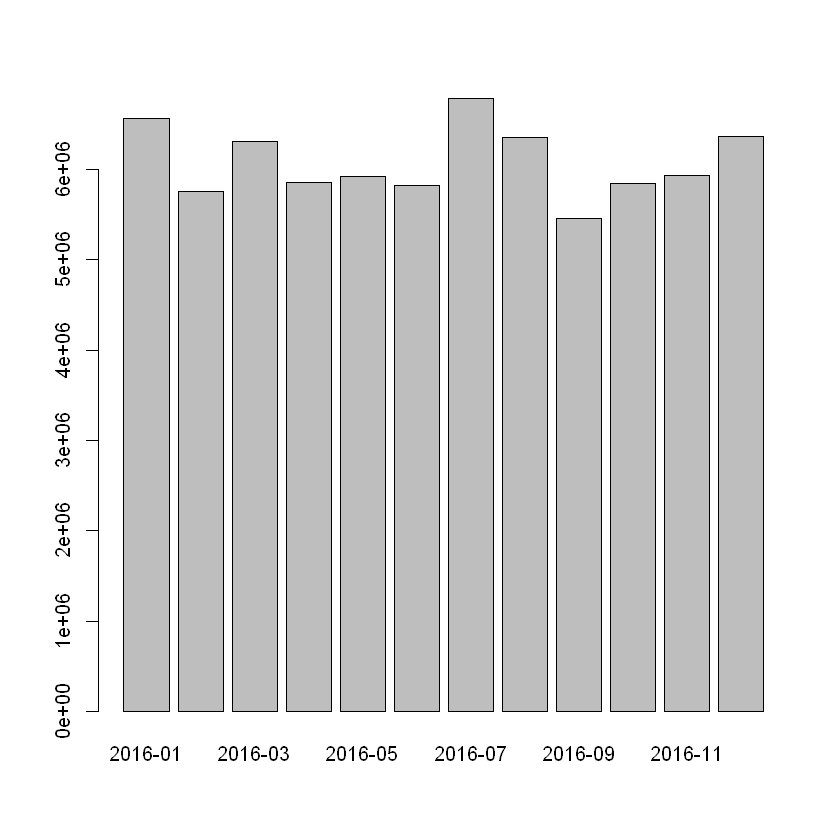

In [54]:
barplot(kangnam.graph$Month.Total, names.arg = kangnam.graph$월)

* ggplot으로 그려보자

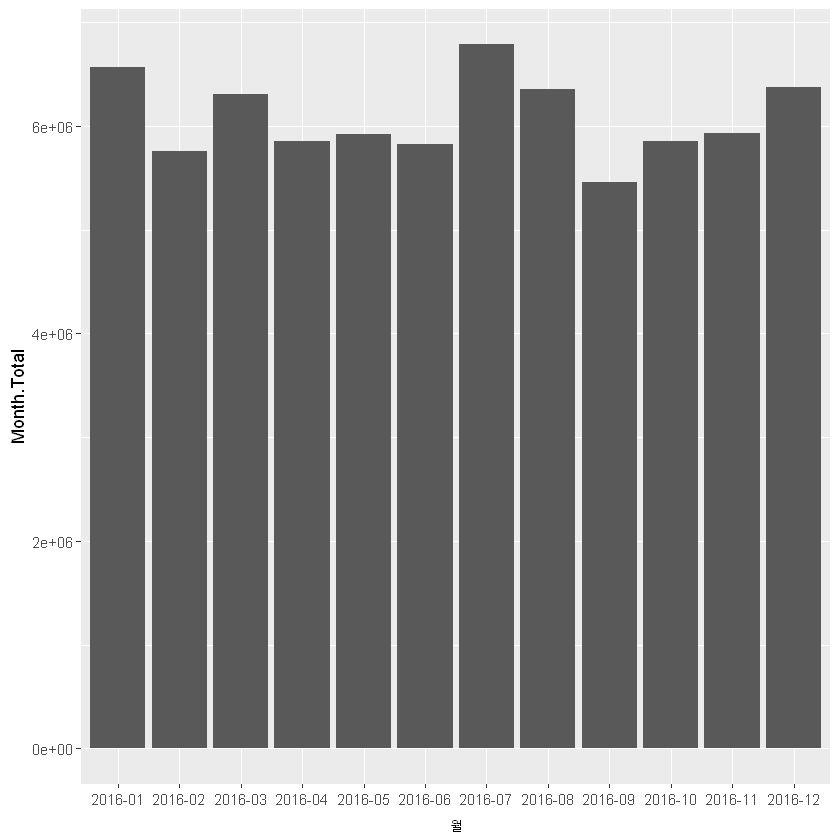

In [56]:
ggplot(kangnam.graph, aes(x=월, y=Month.Total)) +
geom_bar(stat='identity') +
theme(axis.text.x=element_text(angle=0))

## 지수형을 일반형으로
* 위의 숫자가 지수형으로 표시되어 익숙하지 않은 일반인은 힘들다. 
* 정수형으로 변환해서 확인해보자

In [58]:
# 자리수 옵션으로 일반적인 숫자로 변신
options("scipen" = 100)

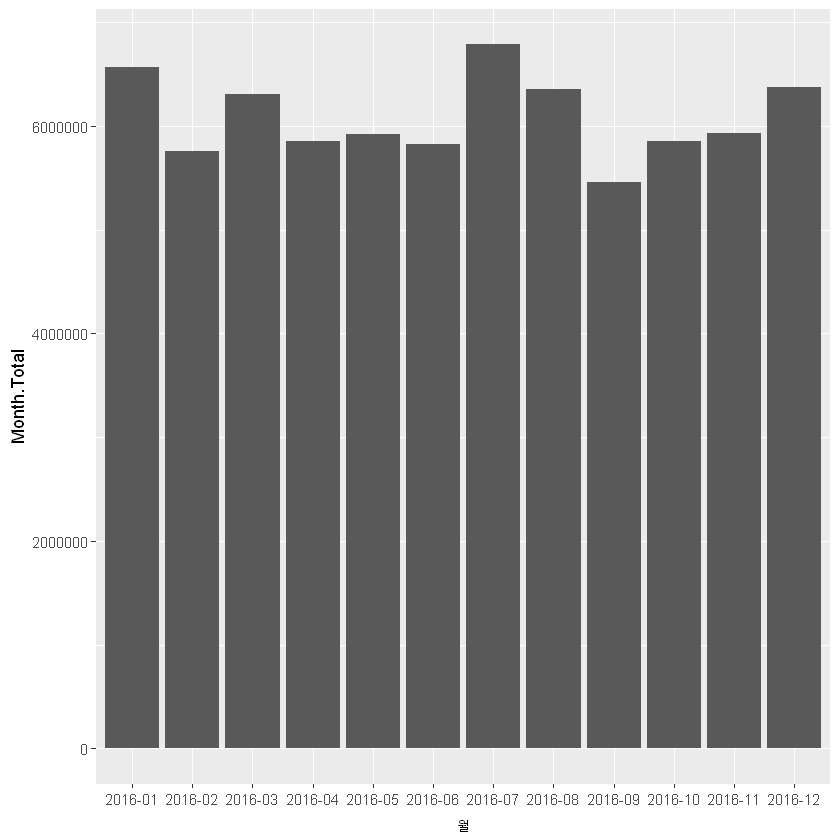

In [59]:
ggplot(kangnam.graph, aes(x=월, y=Month.Total)) +
geom_bar(stat='identity') +
theme(axis.text.x=element_text(angle=0))

# 승차, 하차 구분
* 승차, 하자를 구분해서 그려보자

In [60]:
kangnam.graph.2 <- kangnam %>% group_by(월, 구분) %>% summarise( Month.Total = sum(sum))

In [61]:
kangnam.graph.2
colnames(kangnam.graph.2)

월,구분,Month.Total
2016-01,승차,3257354
2016-01,하차,3308383
2016-02,승차,2857897
2016-02,하차,2897333
2016-03,승차,3137048
2016-03,하차,3171109
2016-04,승차,2901249
2016-04,하차,2955286
2016-05,승차,2937838
2016-05,하차,2981989


[1] "월"          "구분"        "Month.Total"

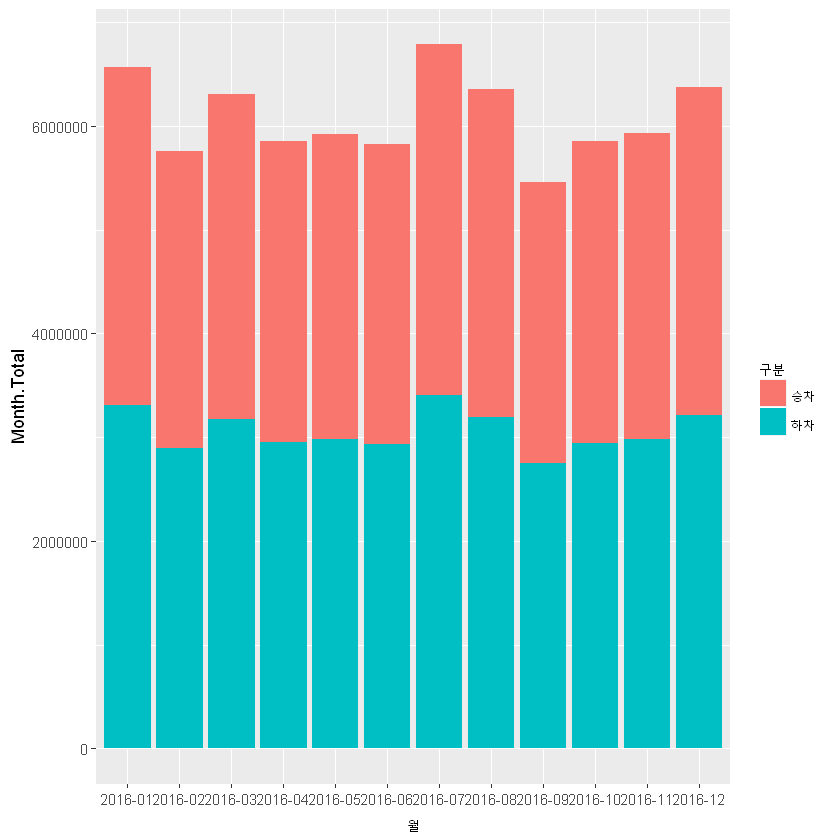

In [62]:
ggplot(kangnam.graph.2, aes(x=월, y=Month.Total, fill=구분)) +
geom_bar(stat='identity') +
theme(axis.text.x=element_text(angle=0))

* 승차 구분을 따로 그려보자

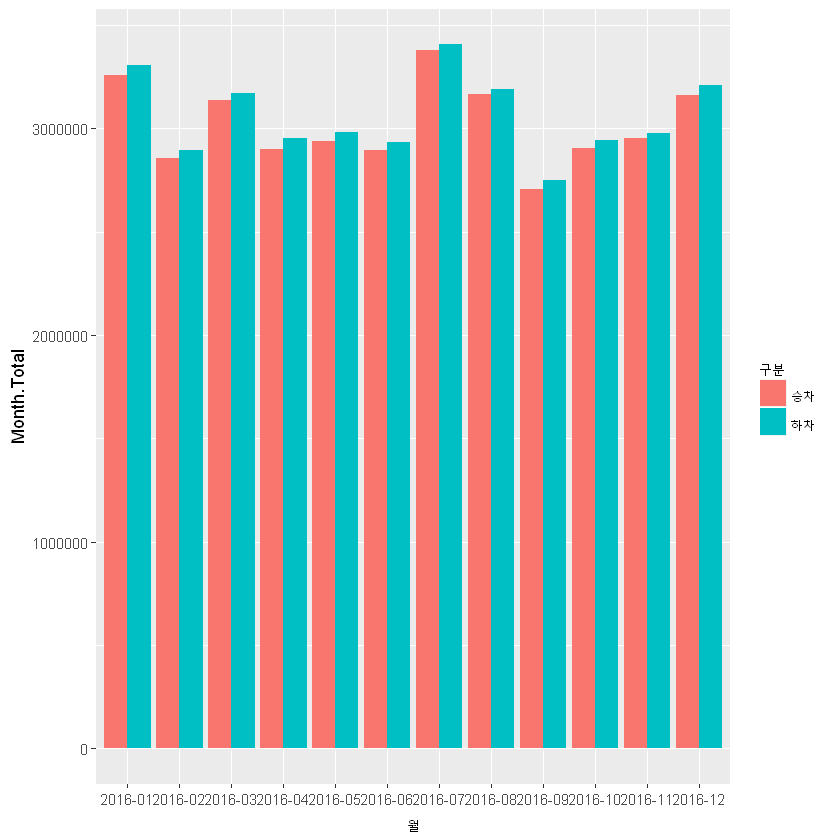

In [63]:
ggplot(kangnam.graph.2, aes(x=월, y=Month.Total, fill=구분)) +
geom_bar(stat='identity', position = "dodge") 

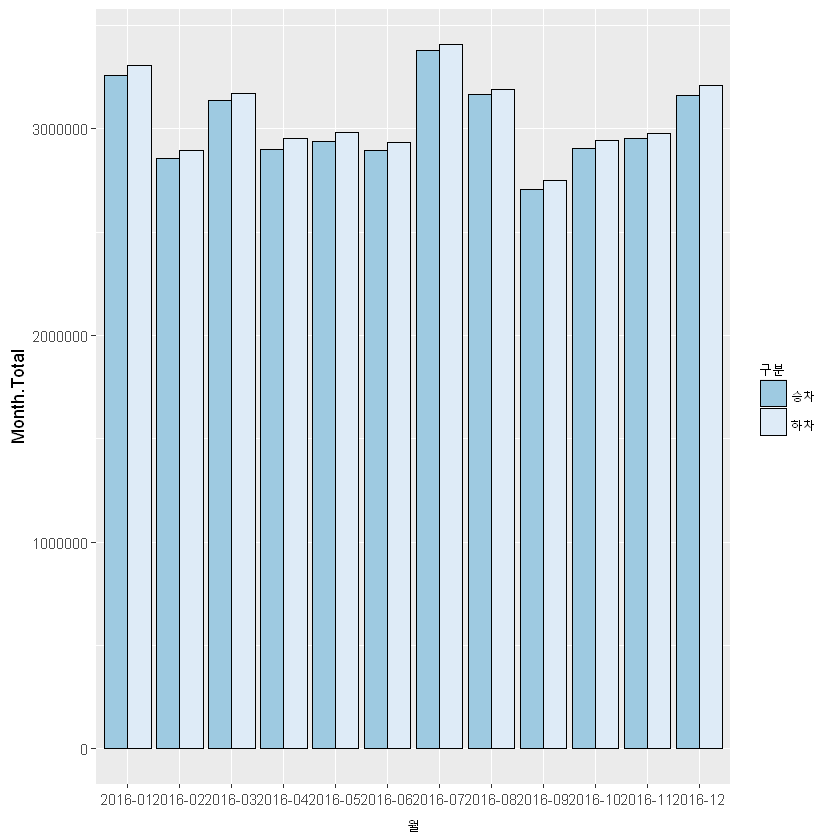

In [64]:
ggplot(kangnam.graph.2, aes(x=월, y=Month.Total, fill=구분)) +
geom_bar(stat='identity', position = "dodge", color = 'black')  +
#scale_fill_brewer(palette = "Pastel1")
scale_fill_brewer(direction = -1) 

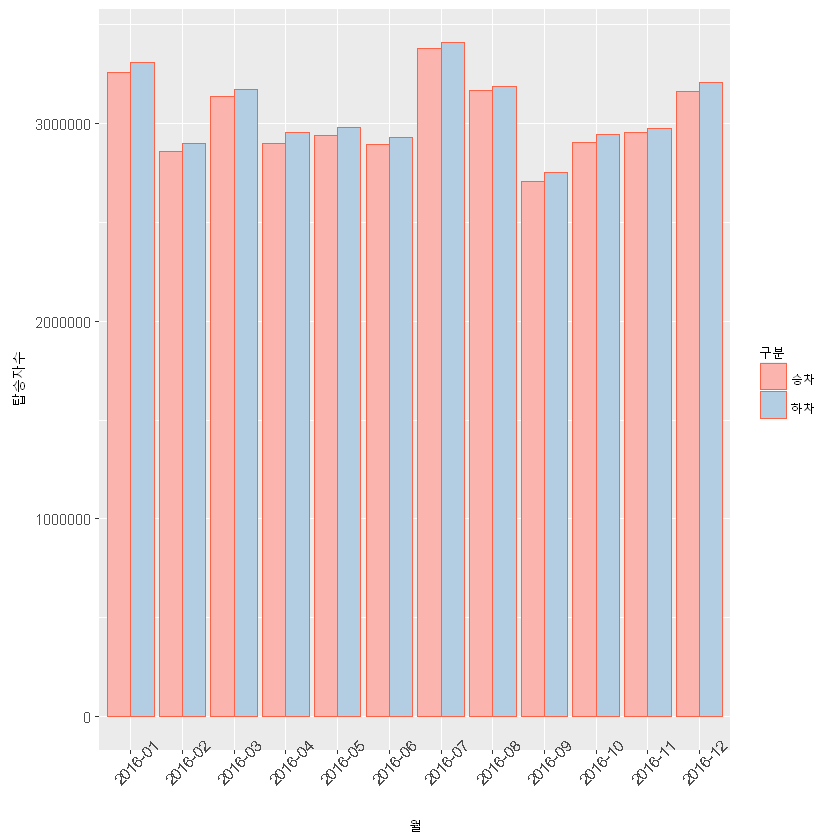

In [65]:
ggplot(kangnam.graph.2, aes(x=월, y=Month.Total, fill=구분)) +
geom_bar(stat='identity', position = "dodge", color = 'tomato1')  +
scale_fill_brewer(palette = "Pastel1") + 
theme(axis.text.x=element_text(angle=45))+
ylab("탑승자수")

# 기본 색상이 맘에 안드니 scale_fill_brewer나 scale_fill_manual를 써서 

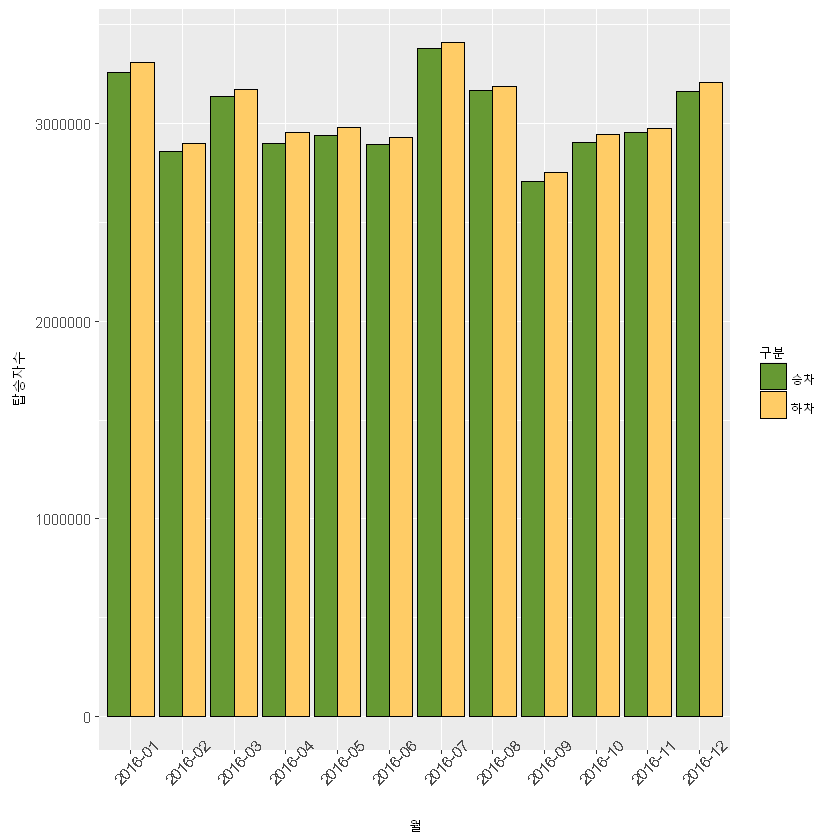

In [66]:
ggplot(kangnam.graph.2, aes(x=월, y=Month.Total, fill=구분)) +
geom_bar(stat='identity', position = "dodge", color = 'black')  +
theme(axis.text.x=element_text(angle=45))+
ylab("탑승자수") + 
scale_fill_manual(values=c("#669933", "#FFCC66"))

# 역별 월별

In [67]:
head(subway,2)
dim(subway)

역명,날짜,구분,X05.06,X06.07,X07.08,X08.09,X09.10,X10.11,X11.12,...,X16.17,X17.18,X18.19,X19.20,X20.21,X21.22,X22.23,X23.24,X00.01,X01.02
동대문(155),2016-01-01,승차,147,168,170,293,479,543,625,...,1034,1065,625,614,475,414,291,138,6,0
동대문(155),2016-01-01,하차,31,164,146,164,354,487,901,...,1167,1158,869,827,660,614,471,348,122,0


[1] 87108    24

In [68]:
subway$sum <- apply(subway[ , c(4:length(subway))], 1, sum)

In [69]:
head(subway)

역명,날짜,구분,X05.06,X06.07,X07.08,X08.09,X09.10,X10.11,X11.12,...,X17.18,X18.19,X19.20,X20.21,X21.22,X22.23,X23.24,X00.01,X01.02,sum
동대문(155),2016-01-01,승차,147,168,170,293,479,543,625,...,1065,625,614,475,414,291,138,6,0,10523
동대문(155),2016-01-01,하차,31,164,146,164,354,487,901,...,1158,869,827,660,614,471,348,122,0,13513
동묘앞(159),2016-01-01,승차,37,65,66,110,161,245,344,...,975,404,198,139,136,81,52,2,0,7209
동묘앞(159),2016-01-01,하차,19,75,88,147,199,359,661,...,353,231,165,149,146,176,144,106,0,7582
서울역(150),2016-01-01,승차,405,339,584,1144,1723,2087,2983,...,3200,3076,2519,2281,2398,2056,996,58,0,42568
서울역(150),2016-01-01,하차,341,1637,1753,1856,2438,2425,2548,...,2656,2134,1859,1394,1344,1056,612,222,0,39336


* 월별 합계를 각 역마다 계산한다.

In [70]:
subway.month <- subway %>% group_by(역명) %>% summarise( station.total = sum(sum))

In [71]:
subway.month <- subway.month %>% arrange(desc(station.total))

* 너무 많으니 상위 15개만 뽑아서 보자

In [74]:
subway.15 <- subway.month[1:15,]

In [75]:
subway.15

역명,station.total
강남(222),72989920
잠실(216),59959378
홍대입구(239),57959028
신림(230),52797959
구로디지털단지(232),46290426
신도림(234),45882099
서울역(150),43057432
고속터미널(329),42586946
삼성(219),41763727
서울대입구(228),38218481


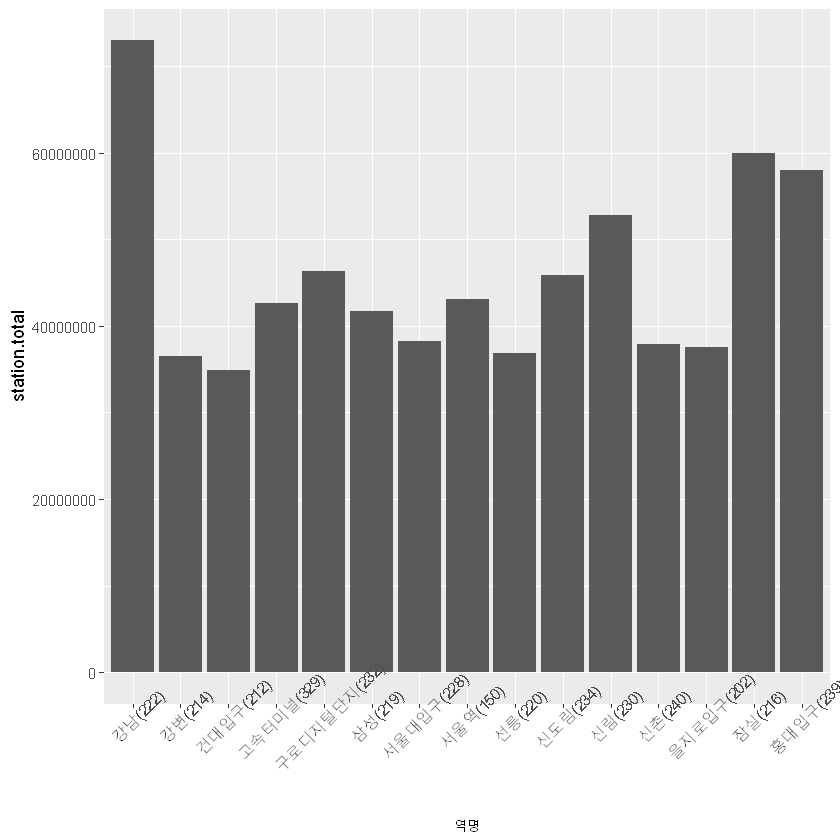

In [76]:
ggplot(subway.15, aes(x=역명, y=station.total)) +
geom_bar(stat = 'identity') + 
theme(axis.text.x=element_text(angle=45))

* 순서를 적용해서 확인해보자

* reorder에 -가 붙으면 역순

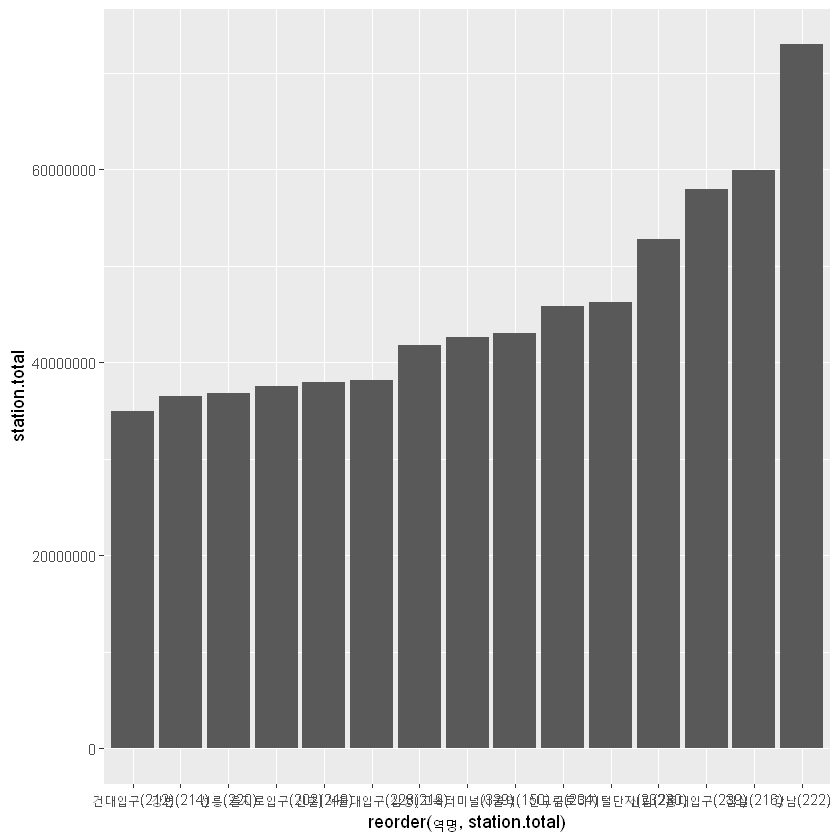

In [78]:
ggplot(subway.15, aes(x=reorder(역명, station.total), y=station.total)) +
geom_bar(stat = 'identity') 

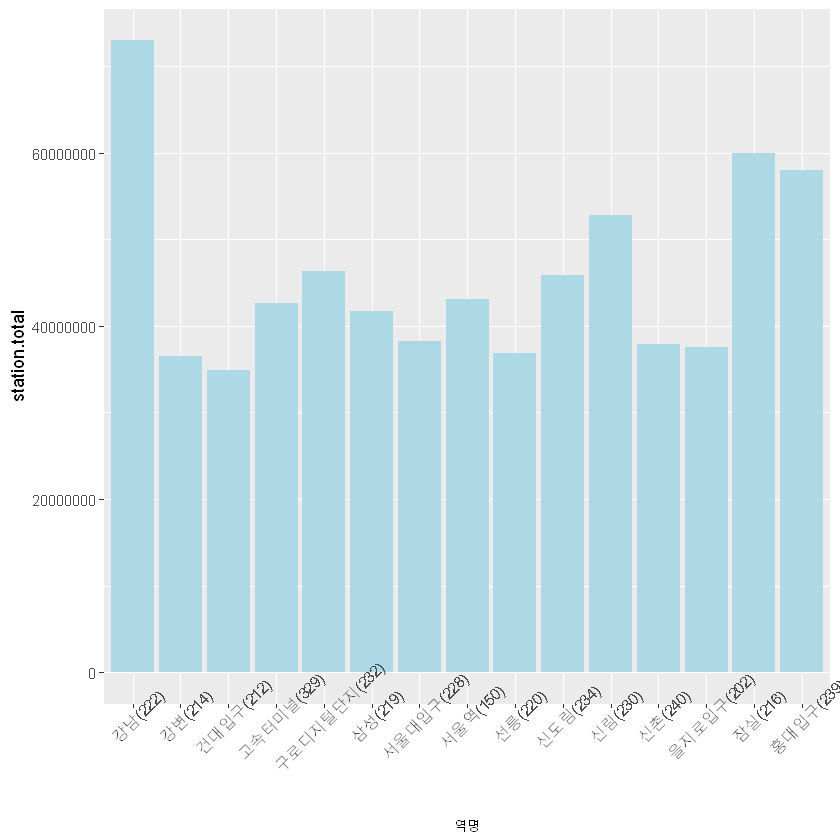

In [79]:
ggplot(subway.15, aes(x=역명, y=station.total)) +
geom_bar(stat = 'identity', fill='lightblue') + 
theme(axis.text.x=element_text(angle=45))

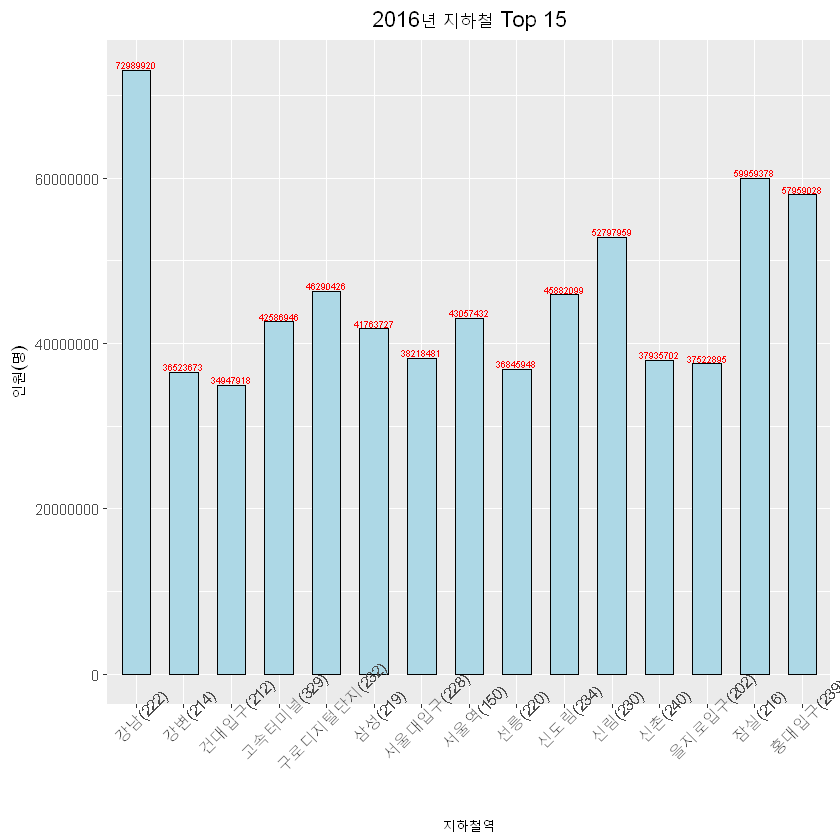

In [80]:
ggplot(subway.15, aes(x=역명, y=station.total)) +
geom_bar(stat = 'identity', fill='lightblue', color = 'black', width = 0.6) +
geom_text(aes(y=station.total + 0.1 ,label=station.total), vjust= -0.2, color = 'red', size=2) + 
theme(axis.text.x=element_text(angle=45)) + 
xlab("지하철역") +
ylab("인원(명)") +
ggtitle("2016년 지하철 Top 15") + 
theme(plot.title = element_text(hjust = 0.5))

## 역명을 승하차로 구분해서

In [81]:
subway.month.gubun <- subway %>% group_by(역명, 구분) %>% summarise( station.total = sum(sum))

In [82]:
subway.month.gubun

역명,구분,station.total
가락시장(340),승차,3386717
가락시장(340),하차,3206053
강남(222),승차,36262673
강남(222),하차,36727247
강변(214),승차,18308635
강변(214),하차,18215038
건대입구(212),승차,16693303
건대입구(212),하차,18254615
경복궁(317),승차,9400643
경복궁(317),하차,9842665


In [83]:
subway.month.gubun$역명 %in% subway.15$역명

[1] FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE
 [13]  TRUE  TRUE FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE
 [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE
 [97] FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE
[109]  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE
[133]  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[145] FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[157] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[169] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[181] FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE
[193]  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[205] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[217] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[229] FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE

* 위에서 index를 추출한 로직을 사용해서 상위 15개역만 추출

In [84]:
subway.month.gubun[subway.month.gubun$역명 %in% subway.15$역명,]

역명,구분,station.total
강남(222),승차,36262673
강남(222),하차,36727247
강변(214),승차,18308635
강변(214),하차,18215038
건대입구(212),승차,16693303
건대입구(212),하차,18254615
고속터미널(329),승차,20905177
고속터미널(329),하차,21681769
구로디지털단지(232),승차,23104249
구로디지털단지(232),하차,23186177


In [85]:
subway.15.gubun <- subway.month.gubun[subway.month.gubun$역명 %in% subway.15$역명,]

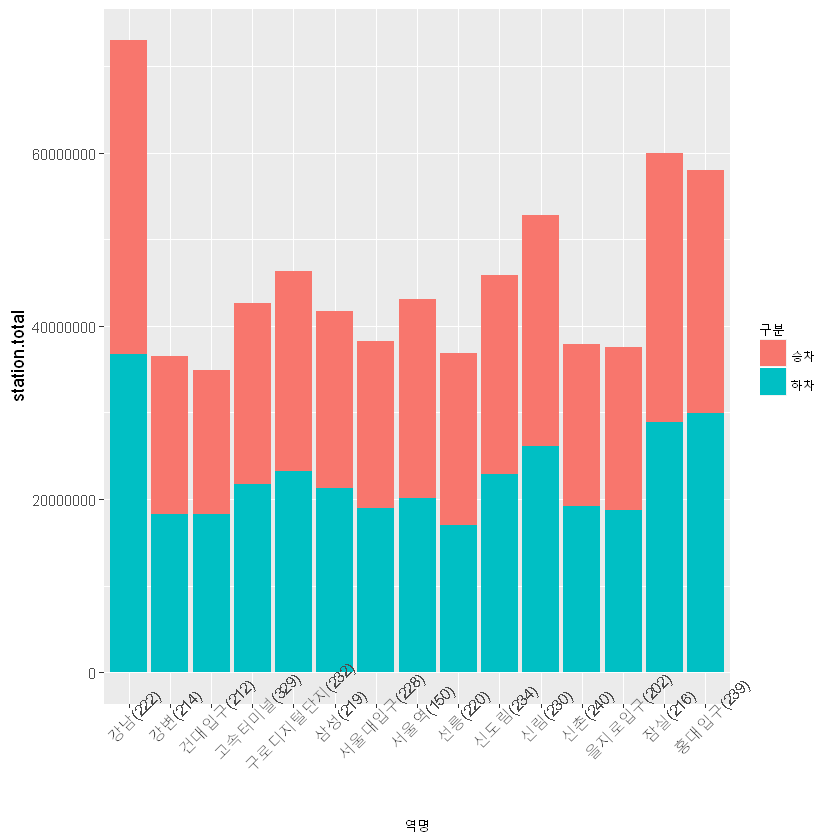

In [86]:
ggplot(subway.15.gubun, aes(x=역명, y=station.total, fill=구분)) + 
geom_bar(stat = 'identity') + 
theme(axis.text.x=element_text(angle=45))

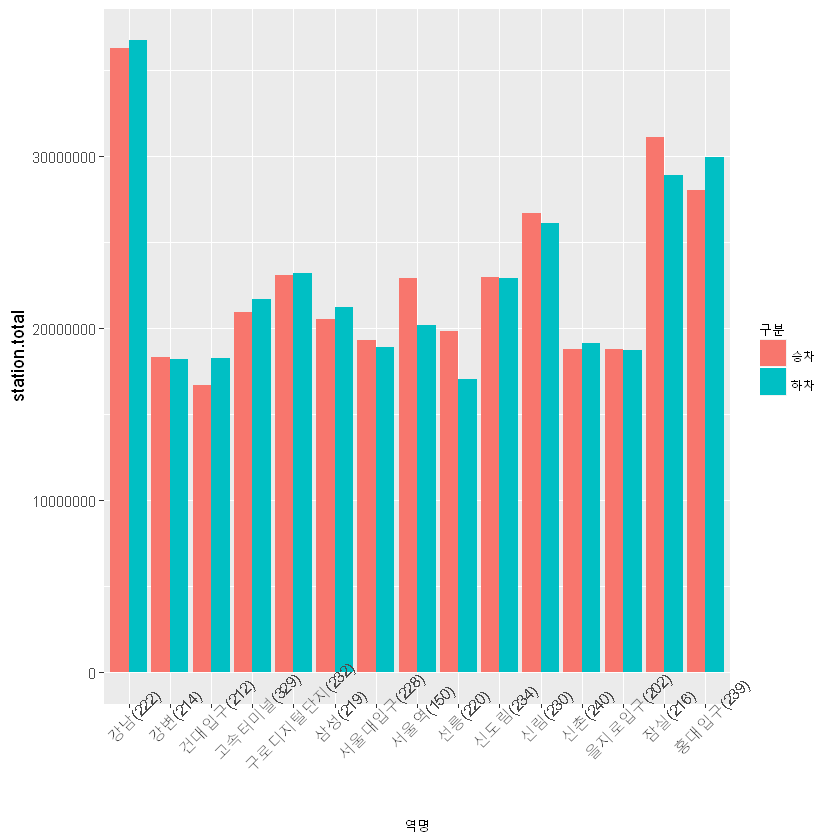

In [87]:
ggplot(subway.15.gubun, aes(x=역명, y=station.total, fill=구분)) + 
geom_bar(stat = 'identity', position = 'dodge') + 
theme(axis.text.x=element_text(angle=45))

# shiny를 위한 그래프
* 아래 코드는 위의 것과 별개로 샤이니에 들어갈 데이터를 생성하는데 있다. 
* 샤이니에서 역별로 선택하면 1년치 승하차 그래프가 출력될수 있도록 데이터를 생성한다. 
* 참고로 샤이니 안에서 생성해도 된다.

In [88]:
library(ggplot2)
library(dplyr)

In [89]:
subway <- read.csv("./Data//all_subway.csv", header = T)

In [90]:
head(subway,3)

X,역명,날짜,구분,X05.06,X06.07,X07.08,X08.09,X09.10,X10.11,...,X16.17,X17.18,X18.19,X19.20,X20.21,X21.22,X22.23,X23.24,X00.01,X01.02
1,동대문(155),2016-01-01,승차,147,168,170,293,479,543,...,1034,1065,625,614,475,414,291,138,6,0
2,동대문(155),2016-01-01,하차,31,164,146,164,354,487,...,1167,1158,869,827,660,614,471,348,122,0
3,동묘앞(159),2016-01-01,승차,37,65,66,110,161,245,...,1129,975,404,198,139,136,81,52,2,0


In [91]:
colnames(subway)

[1] "X"      "역명"   "날짜"   "구분"   "X05.06" "X06.07" "X07.08" "X08.09"
 [9] "X09.10" "X10.11" "X11.12" "X12.13" "X13.14" "X14.15" "X15.16" "X16.17"
[17] "X17.18" "X18.19" "X19.20" "X20.21" "X21.22" "X22.23" "X23.24" "X00.01"
[25] "X01.02"

* check.names이라는 옵션을 사용하지 않았기 때문에 위에서 공백으로 처리된 컬럼이 R에서 자동적으로 X로 부여해줬다.
* 이 컬럼도 제거

In [92]:
new <- subway %>%
mutate( 월 = substr(subway$날짜, 1, 7))

In [93]:
head(new)

X,역명,날짜,구분,X05.06,X06.07,X07.08,X08.09,X09.10,X10.11,...,X17.18,X18.19,X19.20,X20.21,X21.22,X22.23,X23.24,X00.01,X01.02,월
1,동대문(155),2016-01-01,승차,147,168,170,293,479,543,...,1065,625,614,475,414,291,138,6,0,2016-01
2,동대문(155),2016-01-01,하차,31,164,146,164,354,487,...,1158,869,827,660,614,471,348,122,0,2016-01
3,동묘앞(159),2016-01-01,승차,37,65,66,110,161,245,...,975,404,198,139,136,81,52,2,0,2016-01
4,동묘앞(159),2016-01-01,하차,19,75,88,147,199,359,...,353,231,165,149,146,176,144,106,0,2016-01
5,서울역(150),2016-01-01,승차,405,339,584,1144,1723,2087,...,3200,3076,2519,2281,2398,2056,996,58,0,2016-01
6,서울역(150),2016-01-01,하차,341,1637,1753,1856,2438,2425,...,2656,2134,1859,1394,1344,1056,612,222,0,2016-01


In [94]:
new <- new[, -c(1)]

In [96]:
head(new,3)
colnames(new)

역명,날짜,구분,X05.06,X06.07,X07.08,X08.09,X09.10,X10.11,X11.12,...,X17.18,X18.19,X19.20,X20.21,X21.22,X22.23,X23.24,X00.01,X01.02,월
동대문(155),2016-01-01,승차,147,168,170,293,479,543,625,...,1065,625,614,475,414,291,138,6,0,2016-01
동대문(155),2016-01-01,하차,31,164,146,164,354,487,901,...,1158,869,827,660,614,471,348,122,0,2016-01
동묘앞(159),2016-01-01,승차,37,65,66,110,161,245,344,...,975,404,198,139,136,81,52,2,0,2016-01


[1] "역명"   "날짜"   "구분"   "X05.06" "X06.07" "X07.08" "X08.09" "X09.10"
 [9] "X10.11" "X11.12" "X12.13" "X13.14" "X14.15" "X15.16" "X16.17" "X17.18"
[17] "X18.19" "X19.20" "X20.21" "X21.22" "X22.23" "X23.24" "X00.01" "X01.02"
[25] "월"

* 컬럼 순서를 보기 좋게 다시 정렬

In [97]:
new.1 <- new[, c(1,2,ncol(new),3, 4:(ncol(new)-1))]

In [98]:
colnames(new.1)

[1] "역명"   "날짜"   "월"     "구분"   "X05.06" "X06.07" "X07.08" "X08.09"
 [9] "X09.10" "X10.11" "X11.12" "X12.13" "X13.14" "X14.15" "X15.16" "X16.17"
[17] "X17.18" "X18.19" "X19.20" "X20.21" "X21.22" "X22.23" "X23.24" "X00.01"
[25] "X01.02"

In [99]:
head(new.1, 3)

역명,날짜,월,구분,X05.06,X06.07,X07.08,X08.09,X09.10,X10.11,...,X16.17,X17.18,X18.19,X19.20,X20.21,X21.22,X22.23,X23.24,X00.01,X01.02
동대문(155),2016-01-01,2016-01,승차,147,168,170,293,479,543,...,1034,1065,625,614,475,414,291,138,6,0
동대문(155),2016-01-01,2016-01,하차,31,164,146,164,354,487,...,1167,1158,869,827,660,614,471,348,122,0
동묘앞(159),2016-01-01,2016-01,승차,37,65,66,110,161,245,...,1129,975,404,198,139,136,81,52,2,0


In [100]:
colnames(new.1)
ncol(new.1)

[1] "역명"   "날짜"   "월"     "구분"   "X05.06" "X06.07" "X07.08" "X08.09"
 [9] "X09.10" "X10.11" "X11.12" "X12.13" "X13.14" "X14.15" "X15.16" "X16.17"
[17] "X17.18" "X18.19" "X19.20" "X20.21" "X21.22" "X22.23" "X23.24" "X00.01"
[25] "X01.02"

[1] 25

* 합계를 생성한다.

In [101]:
new.1$sum <- apply(new.1[ , c(5:ncol(new.1))], 1, sum)

In [102]:
head(new.1,3)

역명,날짜,월,구분,X05.06,X06.07,X07.08,X08.09,X09.10,X10.11,...,X17.18,X18.19,X19.20,X20.21,X21.22,X22.23,X23.24,X00.01,X01.02,sum
동대문(155),2016-01-01,2016-01,승차,147,168,170,293,479,543,...,1065,625,614,475,414,291,138,6,0,10523
동대문(155),2016-01-01,2016-01,하차,31,164,146,164,354,487,...,1158,869,827,660,614,471,348,122,0,13513
동묘앞(159),2016-01-01,2016-01,승차,37,65,66,110,161,245,...,975,404,198,139,136,81,52,2,0,7209


In [103]:
new.2 <- new.1 %>%
group_by(역명, 구분, 월) %>%
summarise( Total = sum(sum))

In [104]:
new.2

역명,구분,월,Total
가락시장(340),승차,2016-01,263098
가락시장(340),승차,2016-02,242391
가락시장(340),승차,2016-03,291180
가락시장(340),승차,2016-04,281119
가락시장(340),승차,2016-05,287093
가락시장(340),승차,2016-06,282307
가락시장(340),승차,2016-07,281469
가락시장(340),승차,2016-08,275291
가락시장(340),승차,2016-09,270247
가락시장(340),승차,2016-10,293916


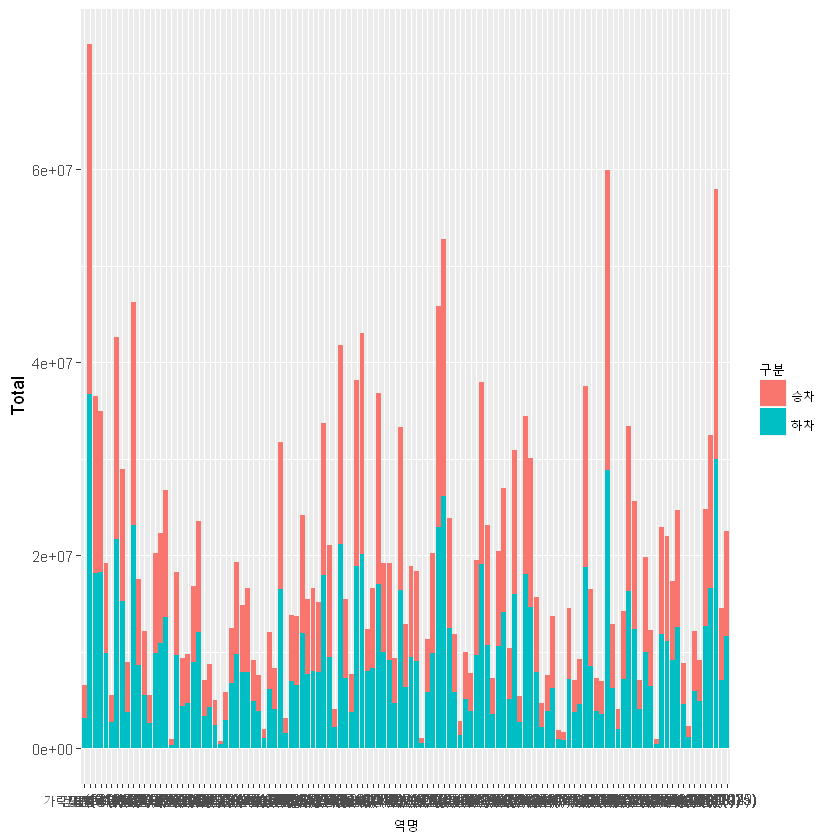

In [123]:
ggplot(new.2, aes(x = 역명, y=Total, fill=구분)) + 
geom_bar(stat='identity')

In [125]:
save(list='new.2', file='test.RData')

In [111]:
colnames(new.2)

[1] "역명"  "구분"  "월"    "Total"

In [113]:
new.2[new.2$역명 == '강남(222)',]

역명,구분,월,Total
강남(222),승차,2016-01,3257354
강남(222),승차,2016-02,2857897
강남(222),승차,2016-03,3137048
강남(222),승차,2016-04,2901249
강남(222),승차,2016-05,2937838
강남(222),승차,2016-06,2893814
강남(222),승차,2016-07,3379605
강남(222),승차,2016-08,3166476
강남(222),승차,2016-09,2709059
강남(222),승차,2016-10,2906071
